## Linear Regression Python implementation with sklearn(44)

We upload the file
And Unzip it

In [8]:
import zipfile
with zipfile.ZipFile('wine+quality.zip','r') as zip_ref:
    zip_ref.extractall('wine_data')


import os
os.listdir('wine_data')

['winequality-white.csv', 'winequality.names', 'winequality-red.csv']

## We import necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

## Step 1
## Load and Inspect data

In [12]:
df = pd.read_csv('wine_data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [15]:
df.duplicated().sum()

np.int64(240)

In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## Step 2
## Descriptive statistics

In [26]:
print("\nSummary statistics (Mean, Std. Median):")
print(df.describe().T[['mean', 'std']])
print("\nMedian:\n", df.median())


Summary statistics (Mean, Std. Median):
                            mean        std
fixed acidity           8.310596   1.736990
volatile acidity        0.529478   0.183031
citric acid             0.272333   0.195537
residual sugar          2.523400   1.352314
chlorides               0.088124   0.049377
free sulfur dioxide    15.893304  10.447270
total sulfur dioxide   46.825975  33.408946
density                 0.996709   0.001869
pH                      3.309787   0.155036
sulphates               0.658705   0.170667
alcohol                10.432315   1.082065
quality                 5.623252   0.823578
alcohol_density_ratio  10.467828   1.096793

Median:
 fixed acidity             7.900000
volatile acidity          0.520000
citric acid               0.260000
residual sugar            2.200000
chlorides                 0.079000
free sulfur dioxide      14.000000
total sulfur dioxide     38.000000
density                   0.996700
pH                        3.310000
sulphates         

# Outliers

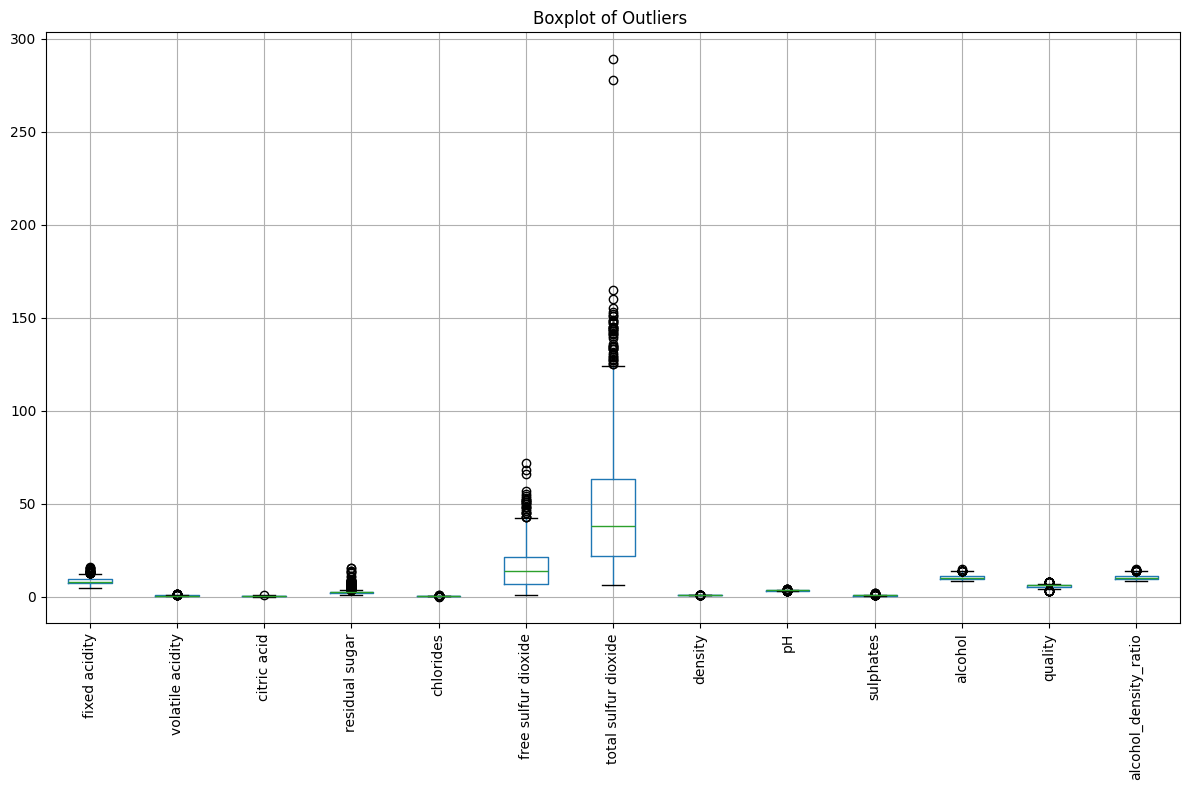

In [27]:
plt.figure(figsize=(12,8))
df.boxplot( rot=90)
plt.title("Boxplot of Outliers ")
plt.tight_layout()
plt.show()

## Step 3
## Feature engineering

In [28]:
df["alcohol_density_ratio"] = df["alcohol"] / df["density"]
df[["alcohol", "density", "alcohol_density_ratio", "quality"]].corr()

,alcohol,density,alcohol_density_ratio,quality
alcohol,1.000000,-0.504995,0.999869,0.480343
density,-0.504995,1.000000,-0.518794,-0.184252
alcohol_density_ratio,0.999869,-0.518794,1.000000,0.479225
quality,0.480343,-0.184252,0.479225,1.000000


## Step 4
## Univariate Analysis

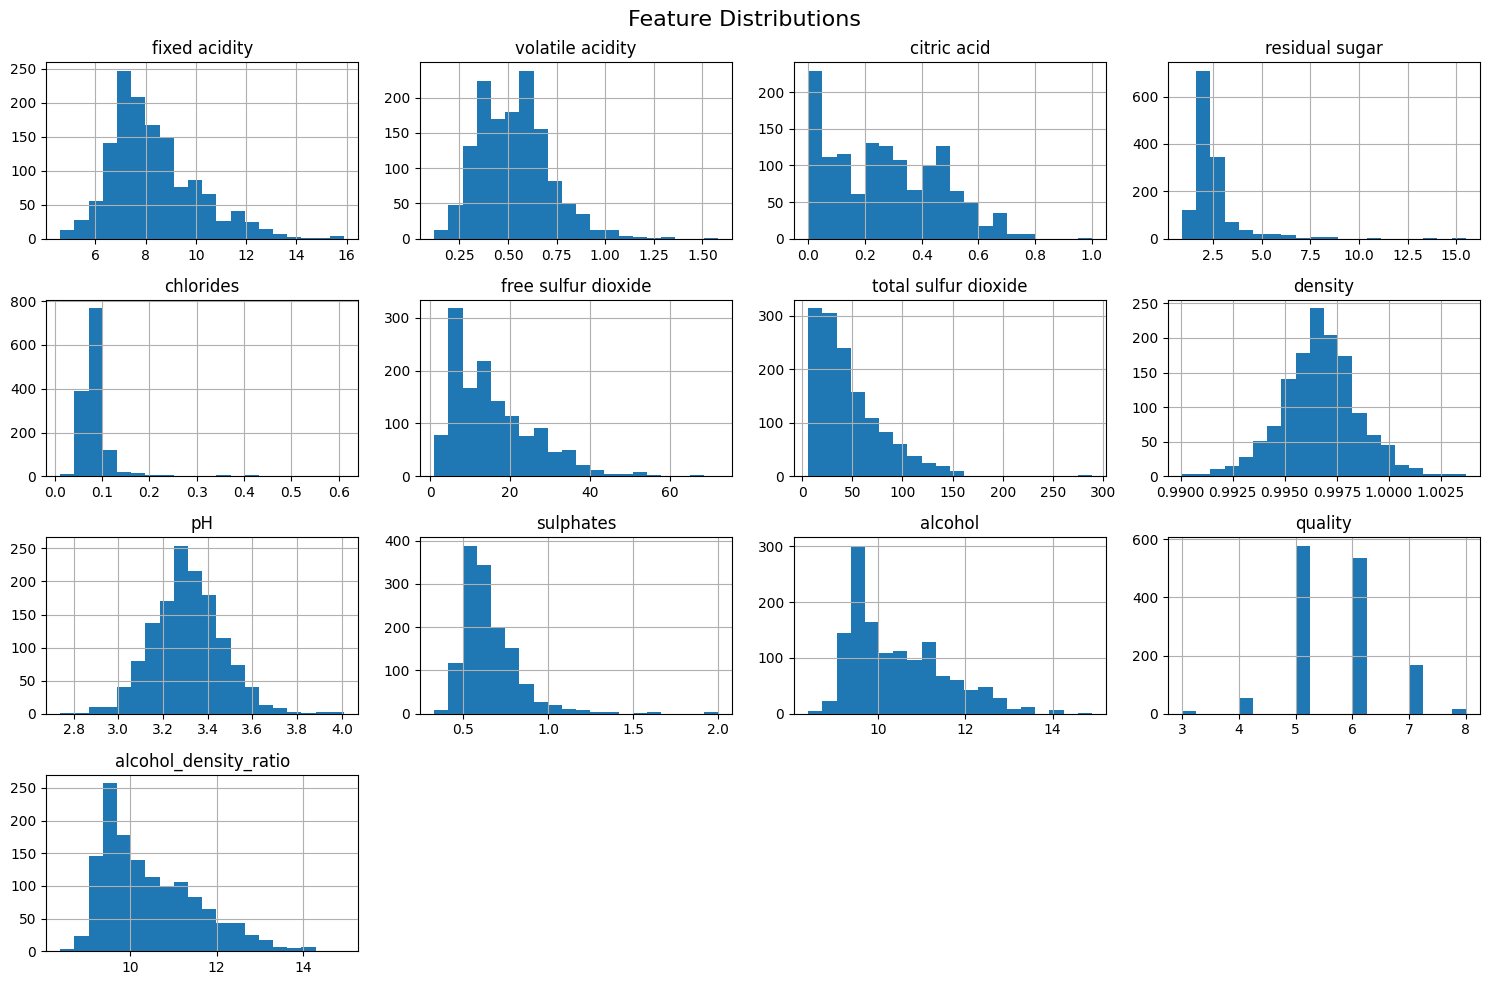

In [29]:
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

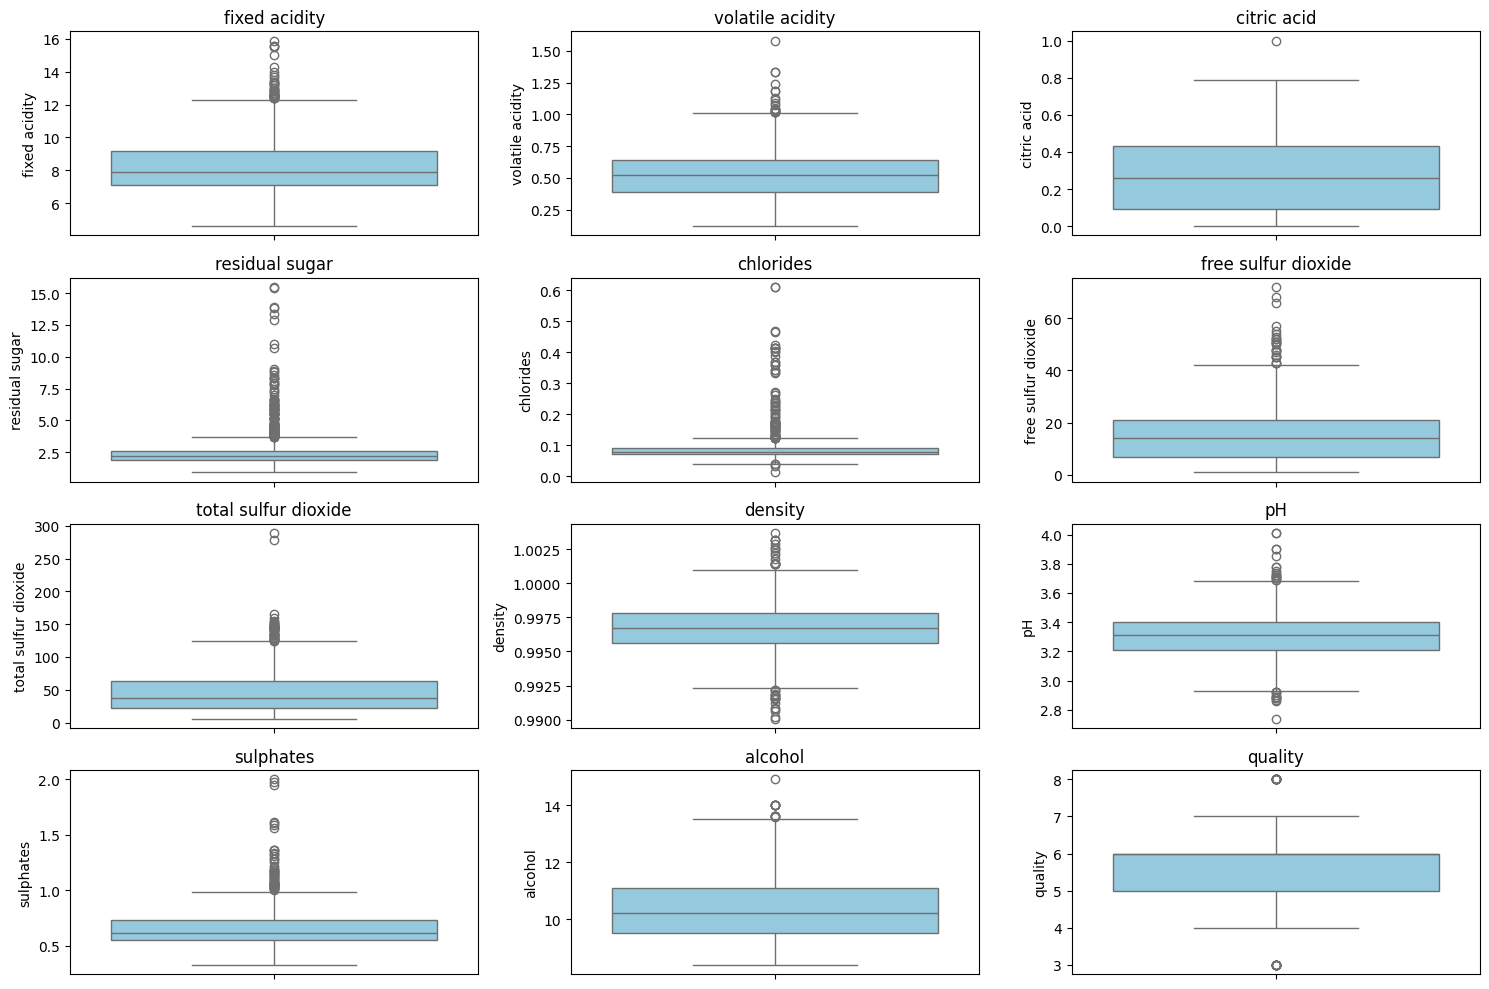

In [33]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()

## Step 5
## Bivariate Analysis

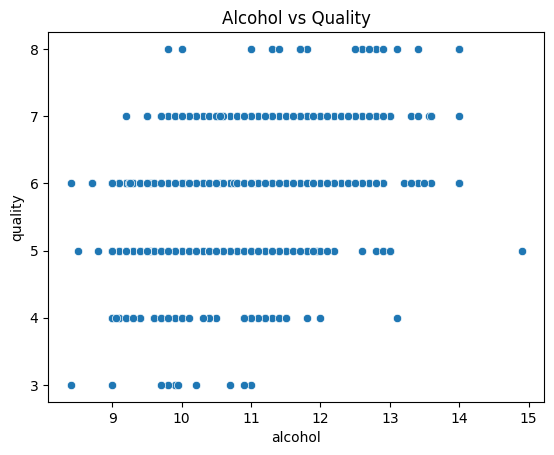

In [34]:
sns.scatterplot(data=df, x="alcohol", y="quality")
plt.title("Alcohol vs Quality")
plt.show()

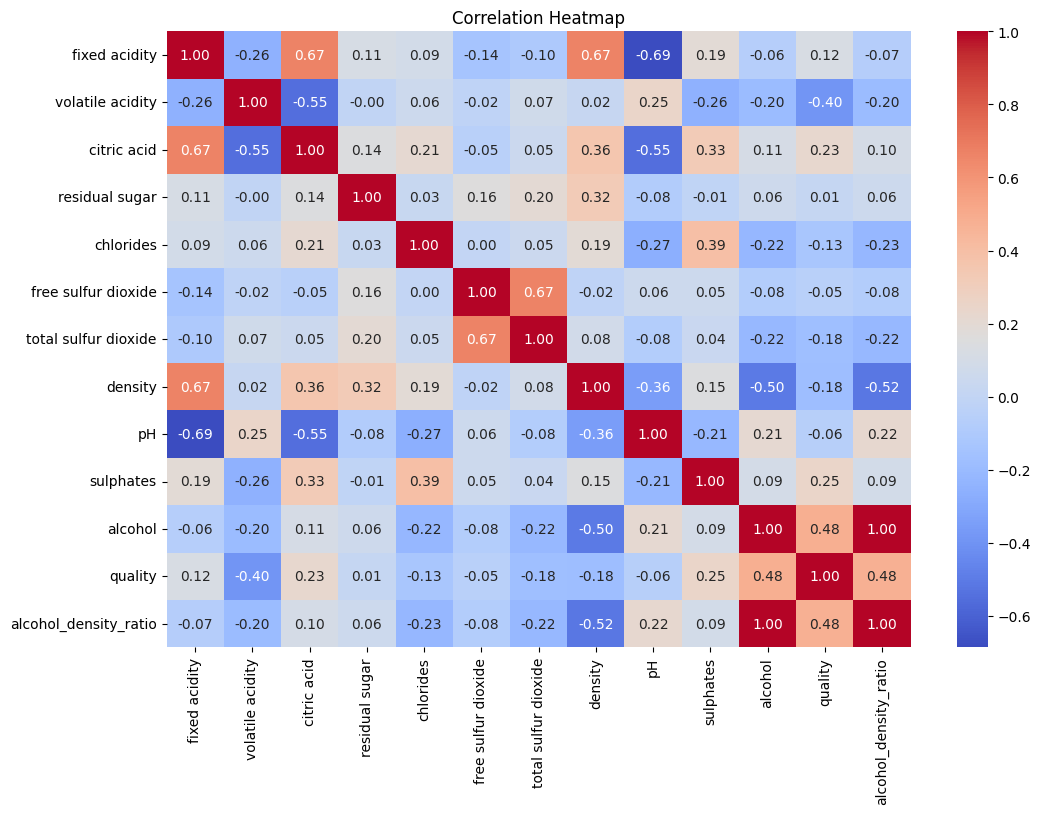

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

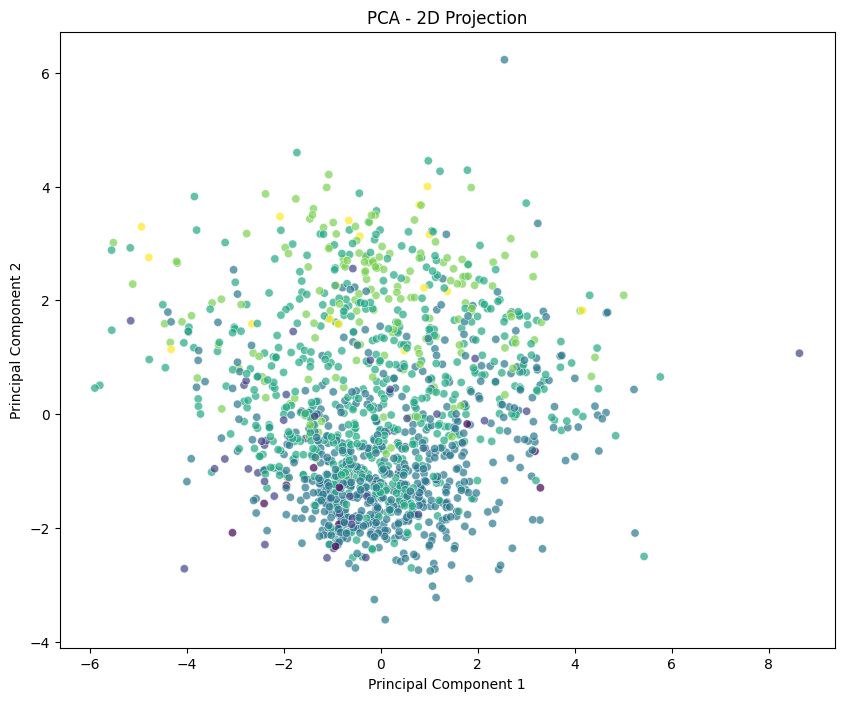

Explained Variance Ratio: [0.26846297 0.20703991]


In [38]:
X = df.drop(['quality'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], c=df['quality'], cmap='viridis', alpha=0.7)
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection")
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

## Step 7
## Data normalization

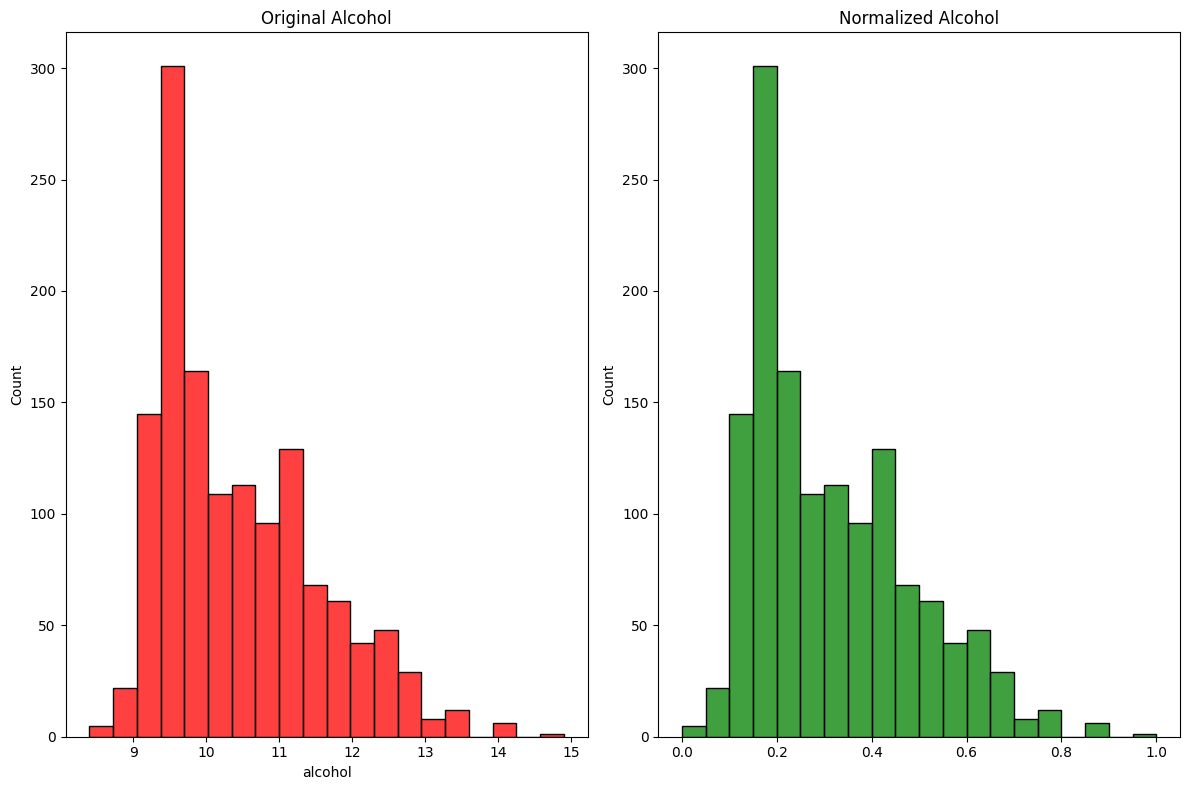

In [39]:
scaler1 = MinMaxScaler()
X_minmax = scaler1.fit_transform(X)

#Compare before and after alcohol

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.histplot(X['alcohol'], bins=20, color='red')
plt.title("Original Alcohol")
plt.subplot(1, 2, 2)
sns.histplot(X_minmax[:, X.columns.get_loc('alcohol')], bins=20, color='green')
plt.title("Normalized Alcohol")
plt.tight_layout()
plt.show()

## Step 8
## Model training

In [40]:
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}
for name, model in models.items():
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  mse = mean_squared_error(y_test, preds)
  r2 = r2_score(y_test, preds)
  print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression - MSE: 0.43, R2: 0.39
Ridge Regression - MSE: 0.43, R2: 0.40
Lasso Regression - MSE: 0.71, R2: -0.01


## Step 9
## Model evaluation

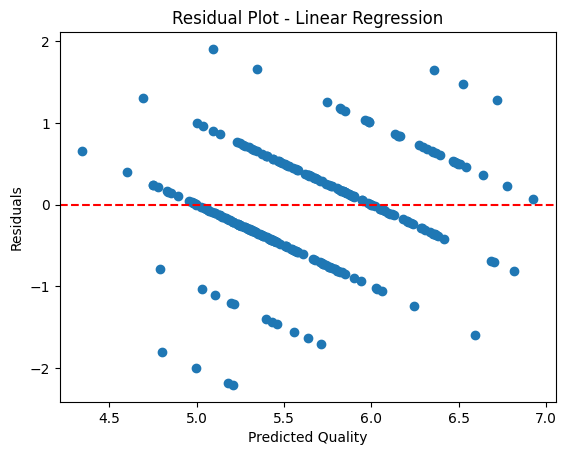

In [41]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot - Linear Regression')
plt.show()

In [43]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.5042134153916507
Root Mean Squared Error: 0.656798451299655


## Step 10
## Hyperparameter tuning

In [44]:
params = {'alpha': [0.01, 0.1, 1,  10]}
grid = GridSearchCV(Ridge(), params, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'alpha': 0.1}
Best Score: 0.3362001876755404


In [45]:
default_model = Ridge()
default_model.fit(X_train, y_train)
default_preds = default_model.predict(X_test)

best_alpha = grid.best_params_['alpha']
tuned_model = Ridge(alpha=best_alpha)
tuned_model.fit(X_train, y_train)
tuned_preds = tuned_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE     : {mae:.4f}")
    print(f"  RMSE    : {rmse:.4f}")

evaluate_model("Default Ridge", y_test, default_preds)
evaluate_model("Tuned Ridge", y_test, tuned_preds)


Default Ridge Results:
  R² Score: 0.3972
  MAE     : 0.5029
  RMSE    : 0.6534

Tuned Ridge Results:
  R² Score: 0.3928
  MAE     : 0.5038
  RMSE    : 0.6558
